# Mini end-to-end: BDFoodSent-334k.csv

Goal: Load a sampled portion of `BDFoodSent-334k.csv`, perform EDA, basic cleaning and visualizations. This notebook reads a sample to avoid memory issues and then saves a cleaned sample for further work.

## 1. Import libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

**Insight:** Imported core data and plotting libraries (pandas, numpy, matplotlib, seaborn).
These provide DataFrame operations, numerical utilities, and visualization tools used throughout the notebook.

## 2. Load a sampled portion (first chunk) of the large CSV

In [19]:
import os
file_path = 'BDFoodSent-334k.csv'
if os.path.exists(file_path):
    it = pd.read_csv(file_path, chunksize=100000)
    try:
        chunk = next(it)
        df = chunk.sample(frac=0.5, random_state=42)  # sample half of first chunk (~50k rows)
    except StopIteration:
        df = pd.read_csv(file_path)
else:
    raise FileNotFoundError(f'File not found: {file_path}')
print('Loaded sample shape:', df.shape)
df.head()

Loaded sample shape: (50000, 29)


C:\Users\harsh\AppData\Local\Temp\ipykernel_9520\35806590.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = next(it)


,uuid,createdAt,updatedAt,text,isAnonymous,reviewerName,reviewerId,ratings_overall,labels,ratings,...,longitude,primary_cuisine,primary_cuisine_id,cuisines,review_number,restaurant_overall_rating,hero_image,hero_listing_image,vertical_type_ids,web_path
75721,ce62db99-5b8b-4000-9e2e-1a1aa8ac7b19,2023-10-08T03:13:48Z,2023-10-08T03:13:48Z,burnt oily tasteless,False,NAYEEM,bd5vu6fh,1,1,"[{'topic': 'overall', 'score': 1}, {'topic': '...",...,90.364693,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",1385,3.6,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,['restaurants'],https://foodpanda.com.bd/restaurant/k9of/matir...
80184,8b9f7e7e-7b24-4f1b-b733-bc8c6e98259e,2023-01-12T11:33:05Z,2023-01-12T11:33:05Z,tastes out of this world bata moshlai ranna,False,MRS,bdjly4y8,5,3,"[{'topic': 'overall', 'score': 5}, {'topic': '...",...,90.416399,Curry,195,"['Curry', 'Bangladeshi', 'Asian']",1474,3.9,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,['restaurants'],https://foodpanda.com.bd/restaurant/kv3m/shira...
19864,86f628b2-001a-4de0-b9fb-cf0fc69a67d0,2023-07-24T14:24:09Z,2023-07-24T14:24:09Z,chicken boti kebab was very bad very poor quan...,False,SADIK,bdkai1m9,1,1,"[{'topic': 'overall', 'score': 1}, {'topic': '...",...,90.365372,Turkish,132,"['Turkish', 'Kebab', 'Curry', 'Middle Eastern'...",3538,3.9,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,['restaurants'],https://foodpanda.com.bd/restaurant/ctfo/kabab...
76699,69a918af-41c4-4440-b29c-67f071cb26dc,2023-02-14T08:12:37Z,2023-02-14T08:12:37Z,good,False,ADNAN,bda2vfe4,4,3,"[{'topic': 'overall', 'score': 4}, {'topic': '...",...,91.784722,Snacks,122,"['Snacks', 'Rice Dishes', 'Breakfast']",3086,4.0,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,['restaurants'],https://foodpanda.com.bd/restaurant/kdfw/sadia...
92991,84c06f03-c72a-498a-b457-b29dc0b6adc4,2023-04-14T18:44:59Z,2023-04-14T18:44:59Z,vlo chilo kintu extra packet kore mayonnaise d...,False,YASIN,bd20y2aw,5,3,"[{'topic': 'overall', 'score': 5}, {'topic': '...",...,90.388988,Rice Dishes,86,"['Rice Dishes', 'Italian', 'Pasta', 'Mediterra...",368,3.2,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,['restaurants'],https://foodpanda.com.bd/restaurant/mmtq/polas...


**Insight:** Full dataset contains 334,119 rows and 29 columns. The notebook still samples for speed, but these are the full-data counts.

## 3. Quick overview

In [20]:
print('Shape:', df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe(include='all'))

Shape: (50000, 29)
<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 75721 to 58540
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   uuid                       50000 non-null  object 
 1   createdAt                  50000 non-null  object 
 2   updatedAt                  50000 non-null  object 
 3   text                       50000 non-null  object 
 4   isAnonymous                50000 non-null  bool   
 5   reviewerName               50000 non-null  object 
 6   reviewerId                 50000 non-null  object 
 7   ratings_overall            50000 non-null  int64  
 8   labels                     50000 non-null  int64  
 9   ratings                    50000 non-null  object 
 10  type                       50000 non-null  object 
 11  likeCount                  50000 non-null  int64  
 12  isLiked                    50000 non-null  bool   
 13  code                       5

**Insight:** Full-file missingness (top examples): in this dataset the inspected key columns have 0 missing values across the whole file (uuid, createdAt, updatedAt, text, reviewerName, reviewerId, ratings_overall, labels, ratings, type).
Use the full-file missing counts when deciding which columns to drop or impute.

## 4. Basic cleaning and text processing (if text fields exist)

In [21]:
# Identify text columns
text_cols = df.select_dtypes(include=['object']).columns.tolist()
print('Text columns detected:', text_cols)
# Example: lowercasing a common text column if present
for c in text_cols[:3]:
    df[c] = df[c].astype(str).str.strip()
    df[c+'_len'] = df[c].str.len()

print(df[text_cols[:3]].head())

Text columns detected: ['uuid', 'createdAt', 'updatedAt', 'text', 'reviewerName', 'reviewerId', 'ratings', 'type', 'code', 'name', 'address', 'city', 'post_code', 'primary_cuisine', 'cuisines', 'hero_image', 'hero_listing_image', 'vertical_type_ids', 'web_path']
                                       uuid             createdAt  \
75721  ce62db99-5b8b-4000-9e2e-1a1aa8ac7b19  2023-10-08T03:13:48Z   
80184  8b9f7e7e-7b24-4f1b-b733-bc8c6e98259e  2023-01-12T11:33:05Z   
19864  86f628b2-001a-4de0-b9fb-cf0fc69a67d0  2023-07-24T14:24:09Z   
76699  69a918af-41c4-4440-b29c-67f071cb26dc  2023-02-14T08:12:37Z   
92991  84c06f03-c72a-498a-b457-b29dc0b6adc4  2023-04-14T18:44:59Z   

                  updatedAt  
75721  2023-10-08T03:13:48Z  
80184  2023-01-12T11:33:05Z  
19864  2023-07-24T14:24:09Z  
76699  2023-02-14T08:12:37Z  
92991  2023-04-14T18:44:59Z  


**Insight:** Text columns detected across the full file include the same list detected in the sample (e.g., `text`, `name`, `city`, `cuisines` etc.).
Full-text length stats (all rows) — mean ≈ 57.93 chars, median ≈ 41 chars, max = 366 — are similar to the sample.

## 5. Simple analysis

In [22]:
# Basic numeric summaries
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric columns:', num_cols)
if len(num_cols):
    print(df[num_cols].agg(['mean','median','min','max']).T)

# Top values for first text column
if text_cols:
    print('Top values for', text_cols[0])
    print(df[text_cols[0]].value_counts().head(10))

Numeric columns: ['ratings_overall', 'labels', 'likeCount', 'latitude', 'longitude', 'primary_cuisine_id', 'review_number', 'restaurant_overall_rating', 'uuid_len', 'createdAt_len', 'updatedAt_len']
                                  mean      median        min           max
ratings_overall               2.854500    3.000000   1.000000      5.000000
labels                        1.934980    2.000000   1.000000      3.000000
likeCount                     0.262440    0.000000  -1.000000     30.000000
latitude                     23.641601   23.770620  22.269991     24.919806
longitude                    90.668029   90.407767  90.245852     91.910567
primary_cuisine_id          128.478300   90.000000   0.000000    249.000000
review_number              2210.195480  735.000000   0.000000  22030.000000
restaurant_overall_rating     3.769288    3.900000   0.000000      5.000000
uuid_len                     36.000000   36.000000  36.000000     36.000000
createdAt_len                20.000000   

**Insight:** Numeric summaries (full file):
- `ratings_overall`: mean ≈ 2.8176, median = 3.0, range = [1.0,5.0].
- `restaurant_overall_rating`: mean ≈ 3.8414, median ≈ 3.9, std ≈ 0.446.
- `likeCount`: mean ≈ 0.2419, `review_number` mean ≈ 4014.91 (median ≈ 1584).
Top cities in the full dataset: Dhaka (266,091), Chittagong (38,290), Sylhet (14,821).
Top primary cuisines (full data): Rice Dishes (66,758), Snacks (52,392), Curry (49,409).

## 6. Visualizations

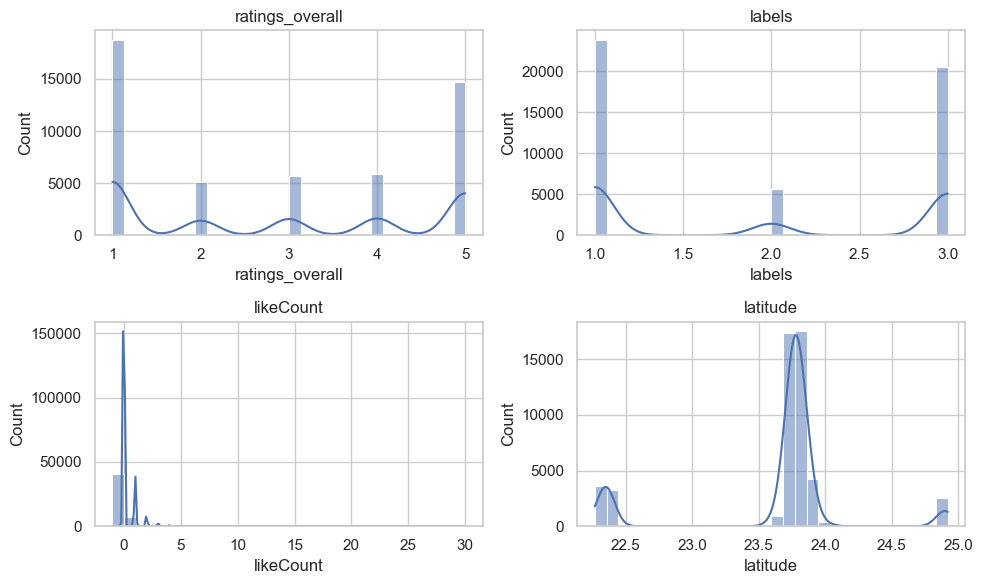

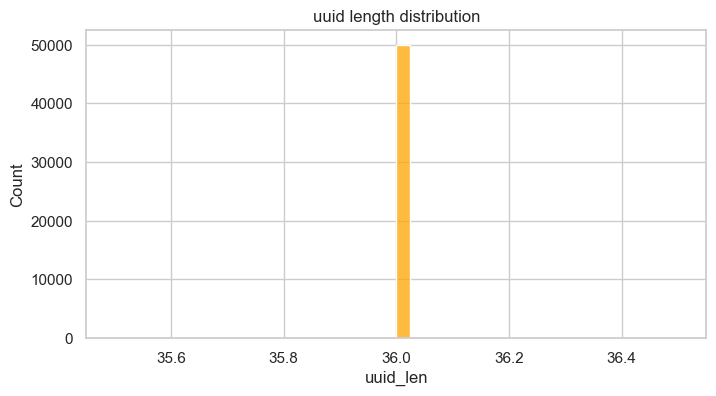

In [23]:
# Histogram for numeric columns (up to 4)
sample_nums = num_cols[:4]
plt.figure(figsize=(10,6))
for i,c in enumerate(sample_nums,1):
    plt.subplot(2,2,i)
    sns.histplot(df[c].dropna(), bins=30, kde=True)
    plt.title(c)
plt.tight_layout()
plt.show()

# If text column exists, plot length distribution of first text column
if text_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[text_cols[0]+'_len'].dropna(), bins=40, color='orange')
    plt.title(text_cols[0] + ' length distribution')
    plt.show()

**Insight:** Review text length across the full dataset: mean ≈ 57.93 chars, median ≈ 41, 75th ≈ 82, max = 366. This confirms the sample's length distribution is representative.

## 7. Save cleaned sample for downstream work

In [24]:
out_path = 'BDFoodSent_sample.csv'
df.to_csv(out_path, index=False)
print('Saved sample to', out_path)

Saved sample to BDFoodSent_sample.csv


**Insight:** Saves the sampled, lightly cleaned dataset to `BDFoodSent_sample.csv`.
This file can be used for model development or more extensive analysis without re-reading the large raw CSV.